### Okuidegbe Wisdom 

## MIE 1624 Assignment 2

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
#!pip install h2o
import h2o
from sklearn.preprocessing import OneHotEncoder
#!pip install category_encoders
import category_encoders as ce
from h2o.tree import H2OTree
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from h2o.estimators import H2ORandomForestEstimator, H2OGradientBoostingEstimator, H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\lorwi\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\lorwi\AppData\Local\Temp\tmpy5b_ug0v
  JVM stdout: C:\Users\lorwi\AppData\Local\Temp\tmpy5b_ug0v\h2o_lorwi_started_from_python.out
  JVM stderr: C:\Users\lorwi\AppData\Local\Temp\tmpy5b_ug0v\h2o_lorwi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,4 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_lorwi_j1ydmg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.606 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
#reading the data into a pandas dataframe
df = pd.read_csv('Kaggle_Salary.csv', low_memory= False)

In [4]:
# checking the head of the dataframe
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,NaN,NaN
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.0,"30,000-39,999"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14.0,">250,000"
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"


In [5]:
# summary desriptive statistics for the dataframe
df.describe()

,Q10_Encoded
count,12497.000000
mean,3.920061
std,4.188416
min,0.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,14.000000


In [6]:
# checking for columns that contain missng data
df.columns[df.isnull().any()]

Index(['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q11', 'Q12_Part_1',
       ...
       'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8', 'Q34_Part_9',
       'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12', 'Q10_Encoded',
       'Q10_buckets'],
      dtype='object', length=210)

In [7]:
#checking the number of columns with missing data
len(df.columns[df.isnull().any()])

210

In [8]:
#Detailed summary of number of rows that have missing values and percentage of missingness
#null_columns = df.columns[df.isnull().any()].tolist()

#for i in null_columns:
#  print('Column \"{}\" has {:,} Missing Value(s), Percentage of Missingness = {:.2%}'
#  .format(i, df[i].isnull().sum(), df[i].isnull().mean()))

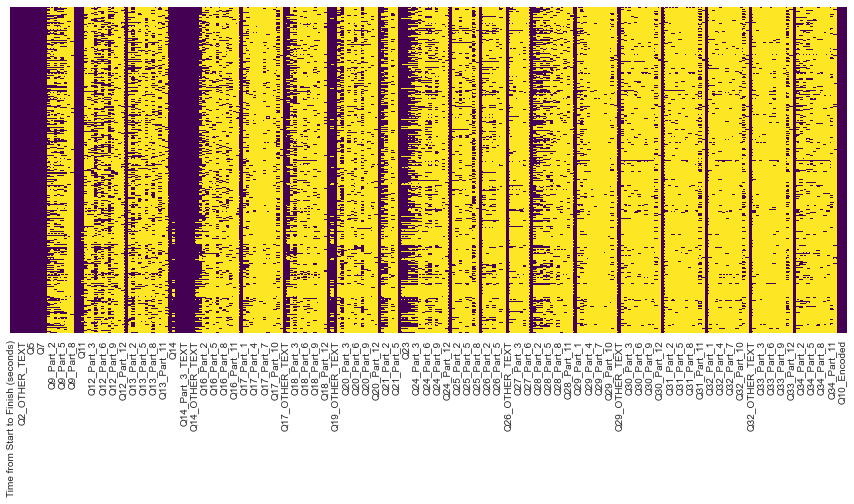

In [9]:
#plotting a heatmap of the missing data to visually assess the extent to which data is missing 
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The figure above shows a lot of rows with no data entries recorded as nulls, most of the nulls are along the columns. From the plot it can be seen that the null columns are answers to survey questions not chosen as options by the survey participants. These features are multiple choice drop down questions used in the survey data where the options could be applicable or not applicable to a survey participant. The first step taken here to handle this is to map the features into new categorical features containing  ones and zeros where 1 would indicate the presence of the variable for the data point and 0 would signify its absence.


In [10]:
# definition of the function to carry out the mapping
def categorize(column):
    newCol = np.where(column.isnull(),0,1)
    return newCol

In [11]:
# definition of a function to map the various columns
def column_transform (categorize, dataframe):
    for i in dataframe.columns:
        if 'Part' in i:
            dataframe[i]=categorize(dataframe[i])
    return dataframe

In [12]:
df = column_transform(categorize, df)

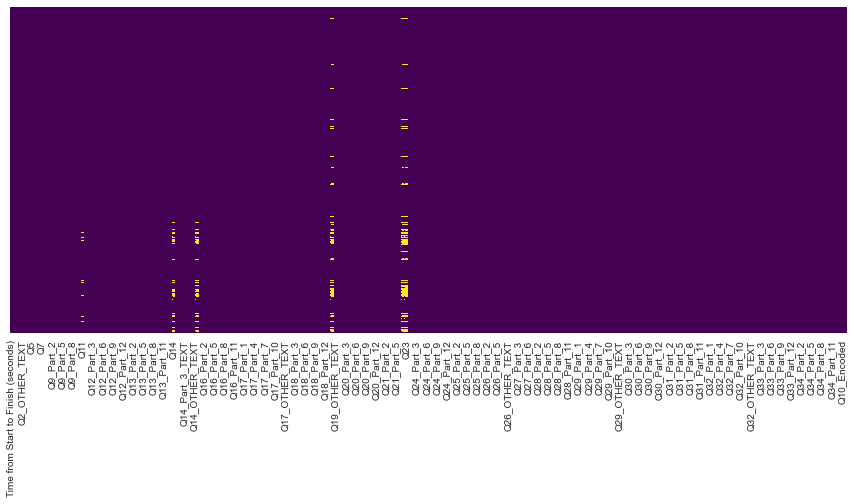

In [13]:
#plotting a heatmap of the missing data to visually assess the extent to which data is missing 
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the plot above, there has been significant reduction in the number of missing data in the dataset. for the remaining data points with missing values, the values in the column would be inspected after which an appropriate filling mechanism for each column or missing value would be used.

In [15]:
#checking the Detailed summary of number of rows that have missing values and percentage of missingness
null_columns = df.columns[df.isnull().any()].tolist()

for i in null_columns:
  print('Column \"{}\" has {:,} Missing Value(s), Percentage of Missingness = {:.2%}'
  .format(i, df[i].isnull().sum(), df[i].isnull().mean()))

Column "Q11" has 247 Missing Value(s), Percentage of Missingness = 1.98%
Column "Q14" has 1,045 Missing Value(s), Percentage of Missingness = 8.36%
Column "Q15" has 1,075 Missing Value(s), Percentage of Missingness = 8.60%
Column "Q19" has 1,844 Missing Value(s), Percentage of Missingness = 14.75%
Column "Q22" has 1,947 Missing Value(s), Percentage of Missingness = 15.58%
Column "Q23" has 1,956 Missing Value(s), Percentage of Missingness = 15.65%
Column "Q10_Encoded" has 1 Missing Value(s), Percentage of Missingness = 0.01%
Column "Q10_buckets" has 1 Missing Value(s), Percentage of Missingness = 0.01%


In [16]:
# further checking the nature of the data in those columns to decide which filling mechaism would be appropriate
for i in df.columns:
    if df.isna().sum()[i] >= 1:
        print(i,'\n', df[i].unique(), '\n','Mode:', df[i].mode()[0],'\n', 'Number of NaN', df.isna().sum()[i] )
    

Q11 
 ['Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'
 '$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99' nan] 
 Mode: $0 (USD) 
 Number of NaN 247
Q14 
 ['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'
 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
 'Local development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)' 'Other'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'
 nan] 
 Mode: Local development environments (RStudio, JupyterLab, etc.) 
 Number of NaN 1045
Q15 
 ['How long have you been writing code to analyze data (at work or at school)?'
 '1-2 years' 'I have never written code' '< 1 years' '20+ years'
 '3-5 years' '5-10 years' '10-20 years' na

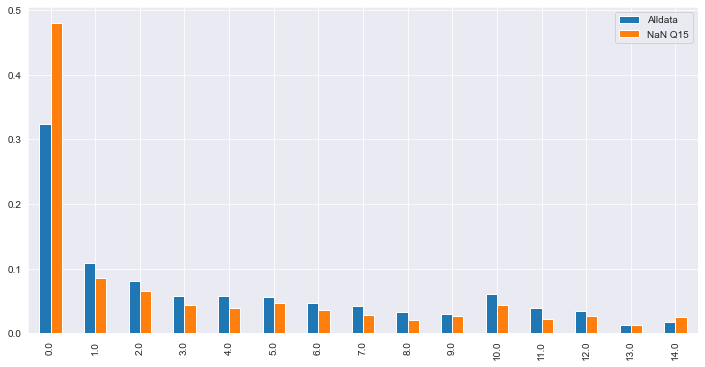

In [17]:
#visually comparing to check for patterns  and similarities in Q10_Encoded where NaN Q15 appears and in the full data set 
a = df['Q10_Encoded'].value_counts(normalize=True)
b = df[df['Q15'].isnull()]['Q10_Encoded'].value_counts(normalize=True)
pd.DataFrame({'Alldata': a, 'NaN Q15':b}).plot(kind='bar',figsize=(12,6))

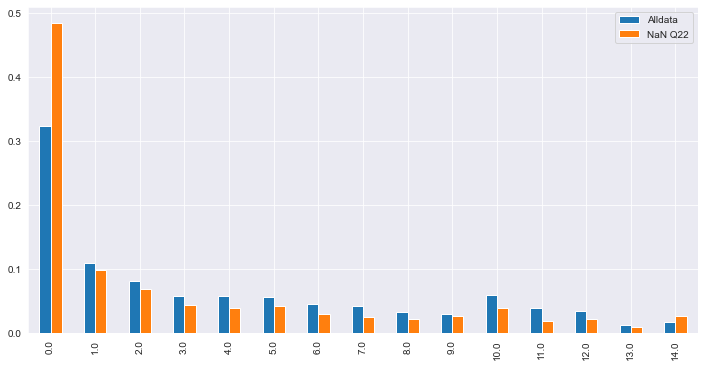

In [18]:
#visually comparing to check for patterns  and similarities in Q10_Encoded where NaN Q22 appears and in the full data set 
c = df['Q10_Encoded'].value_counts(normalize=True)
d = df[df['Q22'].isnull()]['Q10_Encoded'].value_counts(normalize=True)
pd.DataFrame({'Alldata': c, 'NaN Q22':d}).plot(kind='bar',figsize=(12,6))

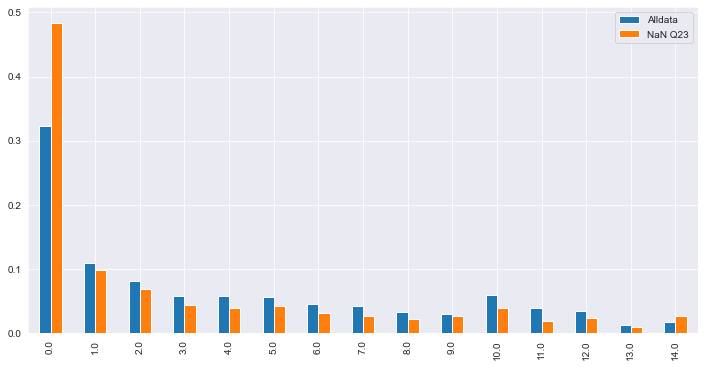

In [19]:
#visually comparing to check for patterns  and similarities in Q10_Encoded where NaN Q23 appears and in the full data set 
e = df['Q10_Encoded'].value_counts(normalize=True)
f = df[df['Q23'].isnull()]['Q10_Encoded'].value_counts(normalize=True)
pd.DataFrame({'Alldata': e, 'NaN Q23':f}).plot(kind='bar',figsize=(12,6))

Based on visualizing and checking the data in the missing columns, the remaining columns with missing data would be filled with the most occurring value (mode) of the data in the column

In [20]:
# defining a function to clean the columns
def clean_null(df):
    df['Q11'].fillna(df['Q11'].mode()[0],inplace=True)
    df['Q14'].fillna(df['Q14'].mode()[0],inplace=True)
    df['Q15'].fillna(df['Q15'].mode()[0],inplace=True)
    df['Q19'].fillna(df['Q19'].mode()[0],inplace=True)
    df['Q22'].fillna(df['Q22'].mode()[0],inplace=True)
    df['Q23'].fillna(df['Q23'].mode()[0],inplace=True)
    return df

In [21]:
# checking the total number of missing values before the cleaning operation
df.isna().sum().sum()

8116

In [22]:
#using the function to clean the data
df = clean_null(df)

In [23]:
# checking the shape of the dataframe after cleaning
df.shape

(12498, 248)

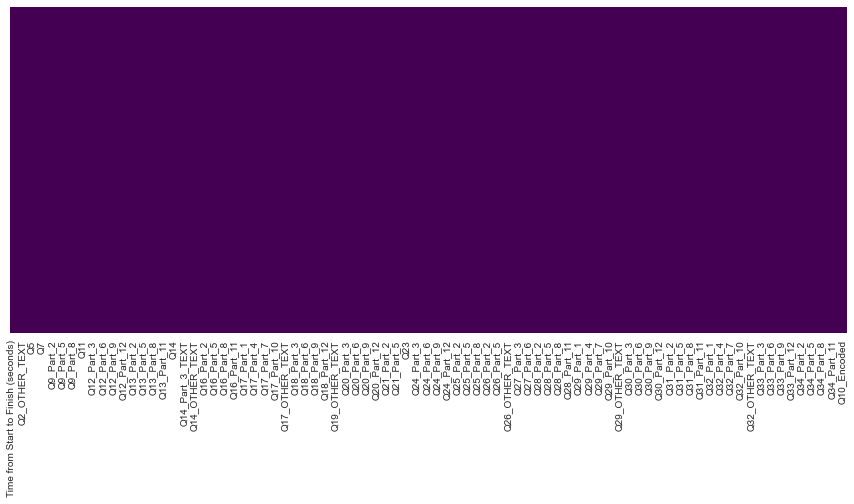

In [24]:
# visualizing the cleaned datafram using a heatmap, to ensure all missing values have been handled
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
# checking the number of missing values in the dataset. Missing values here come index 0 of Q10_encoded and Q10_buckets, they
# are not a problem as they would be dropped during the selection of the subset of data to be used for this analysis.
df.isna().sum().sum()

2

In [26]:
#checking for the datatype in each column
#for i in df.columns:
#    print(i, type(df[i][2]))

In [27]:
# convering datatype of columns with numbers from string to numeric
column = []
for i in df.columns:
    if 'TEXT' in i:
        column.append(i)
print(column)
df[column] = df[column][1:].apply(pd.to_numeric)

['Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_Part_1_TEXT', 'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT', 'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT', 'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT']


In [28]:
# Selecting a subset of data to work with, based on the country column Q3. Selected countries that had partcipants greater than
# 200
#df.Q3.value_counts()
df = df[(df.Q3=='India')| (df.Q3=='United States of America')| (df.Q3=='Brazil')|(df.Q3=='Japan') | (df.Q3=='Russia')|
        (df.Q3=='Germany')| (df.Q3=='United Kingdom of Great Britain and Northern Ireland')| (df.Q3=='Spain')| 
        (df.Q3=='Canada')|(df.Q3=='Australia')| (df.Q3=='China')|(df.Q3=='Nigeria')]

In [29]:
# checking the shape of the new dataset
df.shape

(8020, 248)

In [30]:
# checking for nulls in the dataset after selecting the subset to work with
df.isna().sum().sum()

0

In [31]:
#dropping the first column in the dataset as it is not relevant
df.drop('Time from Start to Finish (seconds)', axis = 1, inplace=True)

In [32]:
# resetting the index of the dataframe as a lot of rows has been removed.
df = df.reset_index(drop=True)

In [33]:
# splitting the data into its features x and the target y while dropping columns that are perfectly correlated with y
x = df.drop(['Q10_Encoded', 'Q10_buckets','Q10'], axis =1)
y = df.Q10_Encoded

In [34]:
# checking for nulls in the dataframe and in the feature set x
print(df.isna().sum().sum())
print(x.isna().sum().sum())

0
0


In [35]:
# checking the shape of x
x.shape

(8020, 244)

In [36]:
# checking the shape of y
y.shape

(8020,)

In [37]:
# using one hot encoding to encode and transform the categorical features in x to features that a machine learning model can 
# work with
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded_x = encoder.fit_transform(x)

In [38]:
# checking the shape of encoded x
encoded_x.shape

(8020, 336)

In [39]:
# checking to ensure no missing data in df, x and encoded_x
print(df.isna().sum().sum())
print(x.isna().sum().sum())
print(encoded_x.isna().sum().sum())

0
0
0


### Q2 Exploratory Data Analysis and Feature Selection

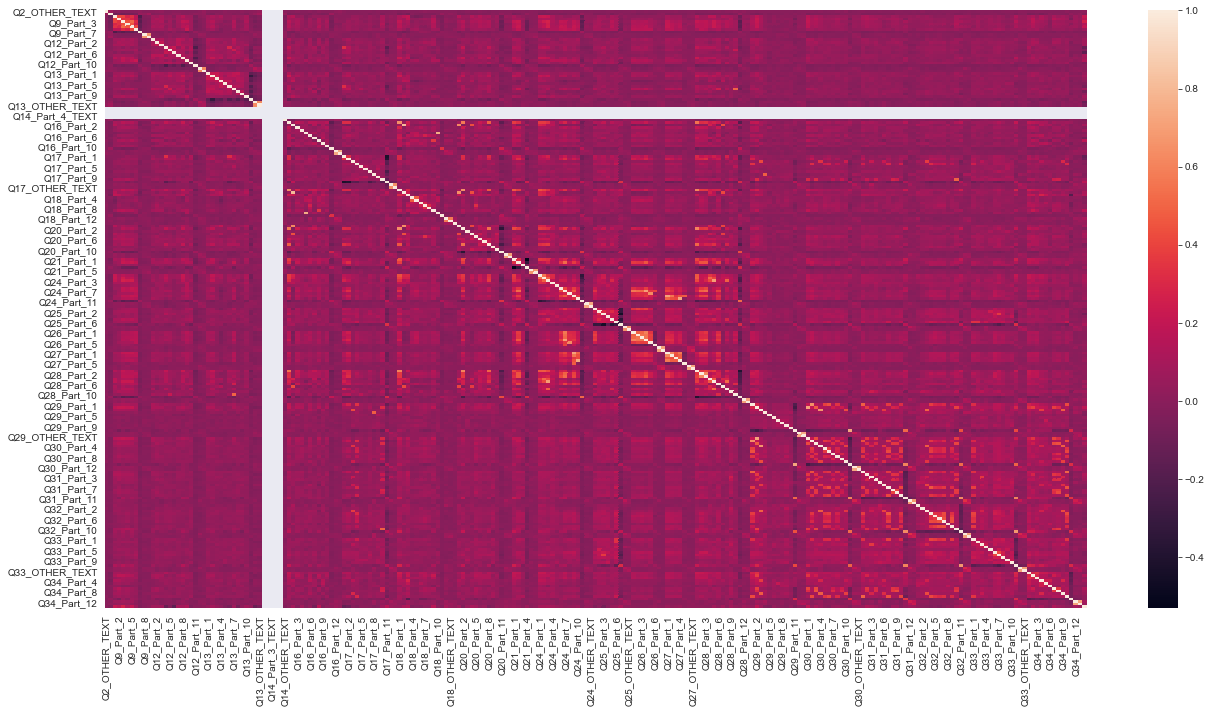

In [40]:
# visually checking the correlation between columns from the original dataFrame.  
plt.figure(figsize=(22,11))
sns.heatmap(df.corr())

There seems to be some level correlation between columns but no perfect correlation except for colums perfectly correlating with themselves

###### To obtain more visual information on variable importance, gradient boosting and random forest algorithms would be used on the original cleaned data frame by using h2o library installed in this notebook, algorithms have feature scaling embedded in them

In [41]:
# creating a h2o frame that would contain the data to be used by the algorithms
hdf=h2o.H2OFrame(df.drop(['Q10_Encoded','Q10'],axis=1))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
# initializing and fiting the data to the Gradient Boosting Algorithm
gbm = H2OGradientBoostingEstimator(ntrees=1,categorical_encoding='auto', seed=1)
gbm.train(y='Q10_buckets', training_frame=hdf)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


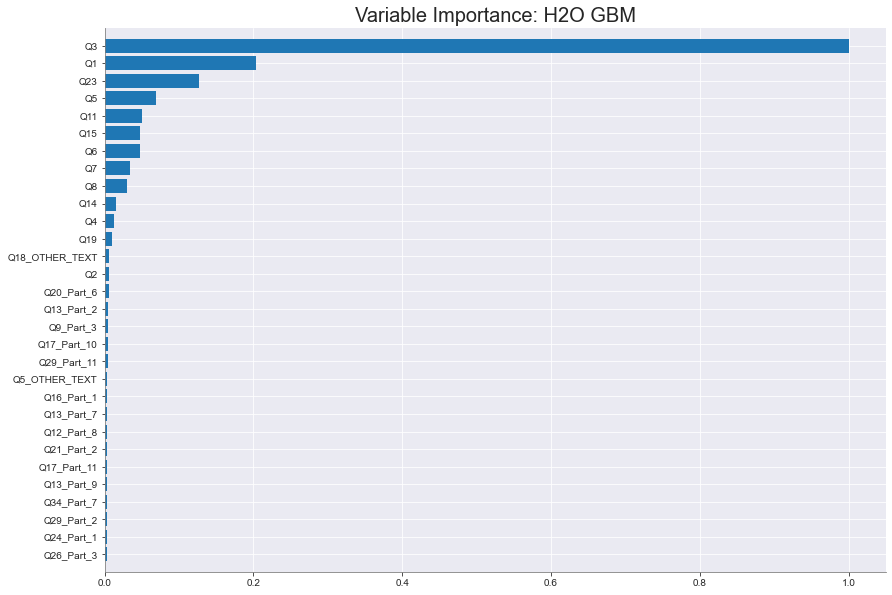

In [43]:
# visualizing the variable importance plot from the algorithm
gbm.varimp_plot(num_of_features=30)

In [44]:
# initializing and fiting the data to the Random Forest Algorithm
Rfm = H2ORandomForestEstimator(ntrees=1,categorical_encoding='auto',seed=1, min_rows=1,mtries=-2)
Rfm.train(y='Q10_buckets',
          training_frame=hdf)

drf Model Build progress: |███████████████████████████████████████████████| 100%


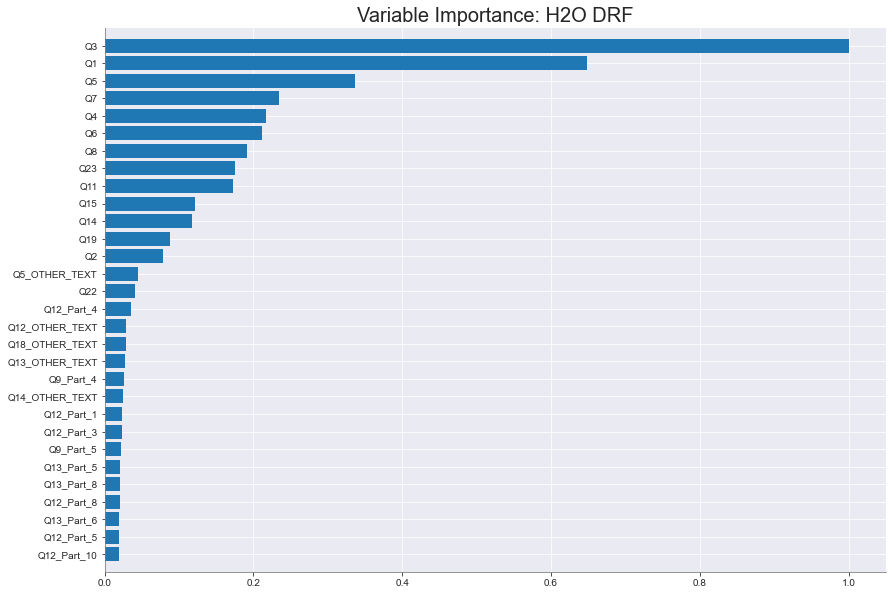

<Figure size 432x288 with 0 Axes>

In [45]:
# visualizing the variable importance plot from the algorithm
Rfm.varimp_plot(num_of_features=30)
plt.savefig('feature importance')

Text(0, 0.5, 'Salary Level of Survey Participants')

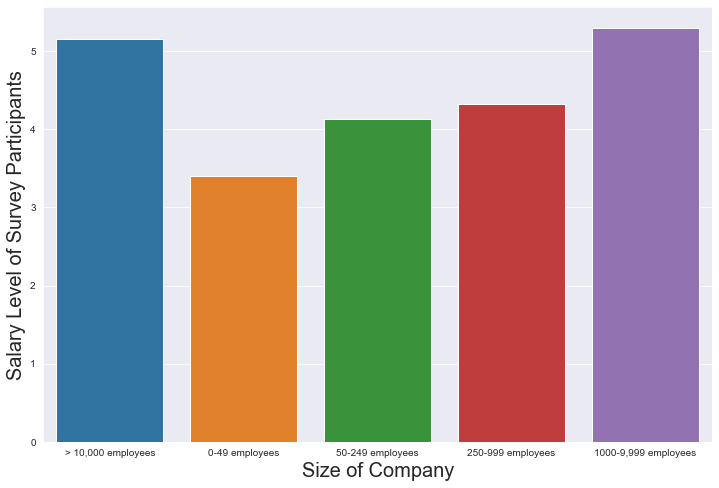

In [46]:
# visualizing the variable effects of the variables selected by the on the salary classes the algorithm
plt.figure(figsize=(12,8))
sns.barplot(x=df.Q6, y =df.Q10_Encoded, ci=0.0)
plt.xlabel('Size of Company',size=20 )
plt.ylabel('Salary Level of Survey Participants', size=20)

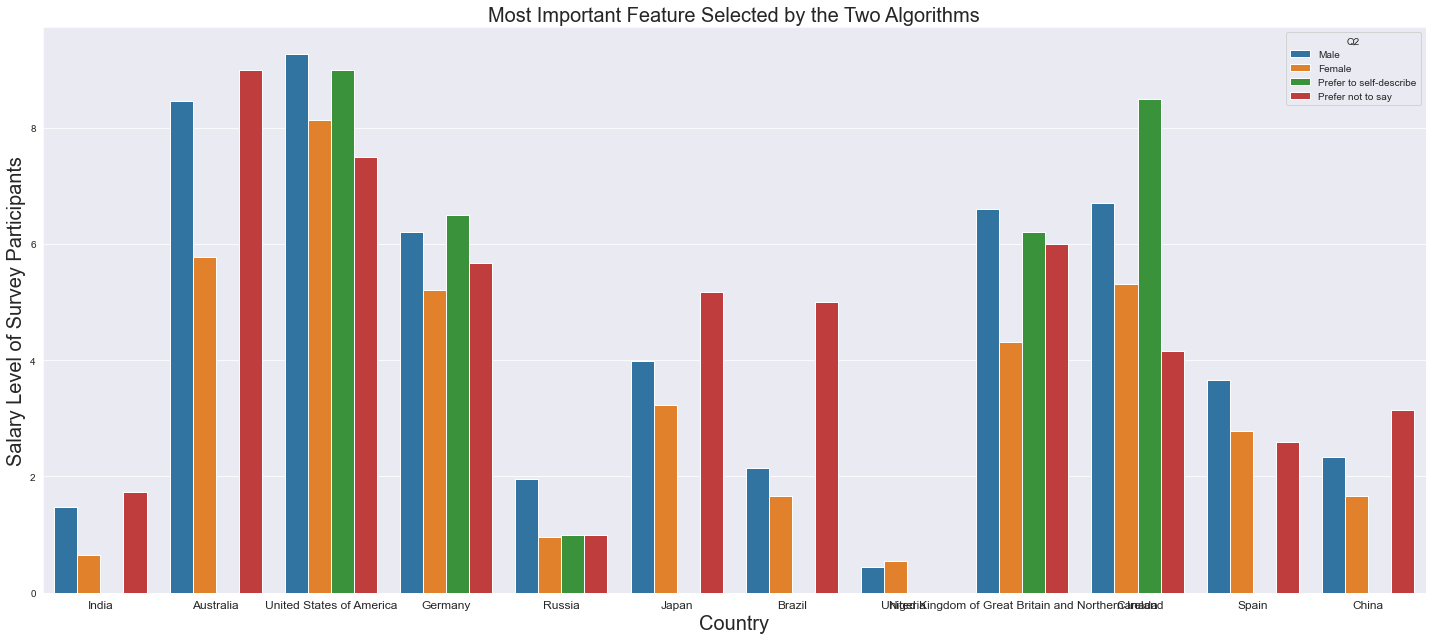

In [47]:
# visualizing the variable effects of the variables selected by the on the salary classes the algorithm
plt.figure(figsize=(20,9))
sns.barplot(x=df.Q3, y=df.Q10_Encoded, hue=df.Q2, ci=0.0)
plt.xlabel('Country',size=20 )
plt.ylabel('Salary Level of Survey Participants', size=20)
plt.title('Most Important Feature Selected by the Two Algorithms', size=20)
plt.xticks(fontsize=12)
plt.tight_layout()

Text(0.5, 1.0, 'Another Important Feature Selected by the Two Algorithms')

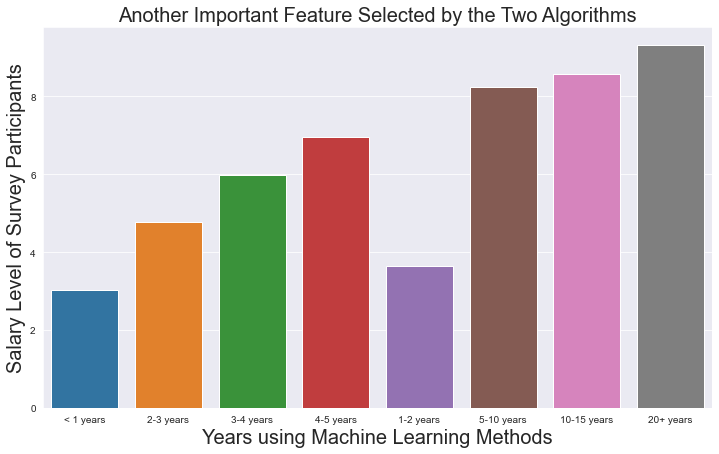

In [48]:
# visualizing the variable effects of the variables selected by the on the salary classes the algorithm
plt.figure(figsize=(12,7))
sns.barplot(df.Q23,df.Q10_Encoded, ci=0.0)
plt.xlabel('Years using Machine Learning Methods',size=20 )
plt.ylabel('Salary Level of Survey Participants', size=20)
plt.title('Another Important Feature Selected by the Two Algorithms', size=20)

Text(0.5, 1.0, 'Second Most Important Feature Selected by the Two Algorithms')

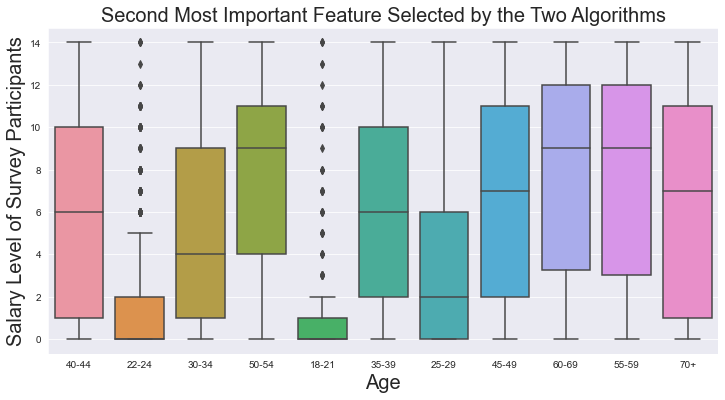

In [49]:
# visualizing the variable effects of the variables selected by the on the salary classes the algorithm
plt.figure(figsize=(12,6))
sns.boxplot(df.Q1,df.Q10_Encoded)
plt.xlabel('Age',size=20 )
plt.ylabel('Salary Level of Survey Participants', size=20)
plt.title('Second Most Important Feature Selected by the Two Algorithms', size=20)

Text(0.5, 0, 'Job Title')

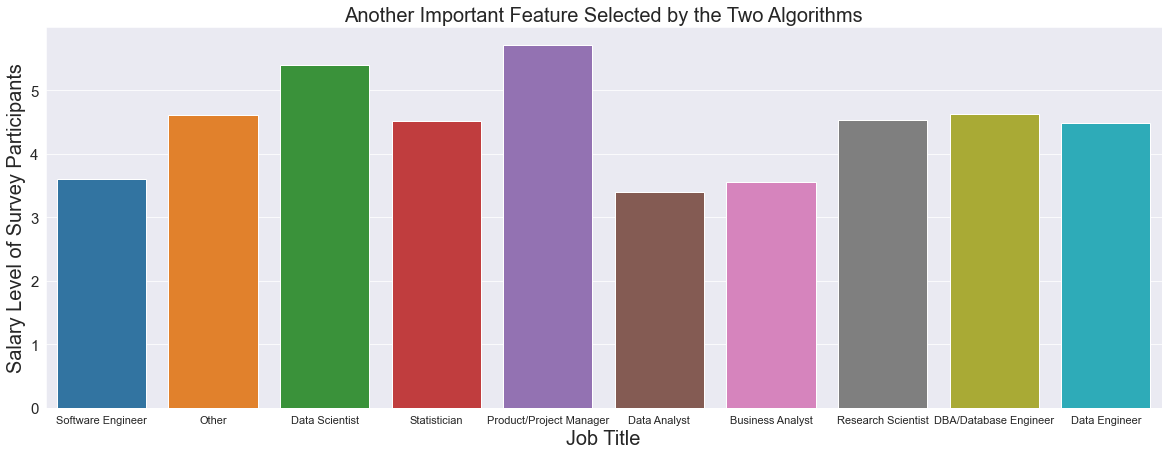

In [50]:
# visualizing the variable effects of the variables selected by the on the salary classes the algorithm
plt.figure(figsize=(20,7))
sns.barplot(df.Q5,df.Q10_Encoded, ci=0.0)
plt.ylabel('Salary Level of Survey Participants', size=20)
plt.title('Another Important Feature Selected by the Two Algorithms', size=20)
plt.xticks(size=11)
plt.yticks(size=15)
plt.xlabel('Job Title',size=20 )

In [51]:
#checking to ensure no missing values
print(df.isna().sum().sum())
print(x.isna().sum().sum())
print(encoded_x.isna().sum().sum())

0
0
0


Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. In this assignment, new fearures were engineered from existing features that represented options that were not selected by the survey participants. These new features were created using the user defined function "categorize". Some of those features created were identified as important features by the two algorithms used for feaure imporance ranking. 

###### Feature Selection

In [52]:
# first splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((5614, 336), (2406, 336))

In [53]:
# checking to ensure there are no missing values in the dataset
print(df.isna().sum().sum())
print(x.isna().sum().sum())
print(encoded_x.isna().sum().sum())
print(X_train.isna().sum().sum())

0
0
0
0


In [54]:
# scaling the features of the train set
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)

In [55]:
# Selecting the best 30 features from the dataset using regularization and a feature selection algorithm from the scikit learn
# library
sel_ = SelectFromModel(LogisticRegression(max_iter=200),max_features=30)
sel_.fit(scaled,y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=200), max_features=30)

In [56]:
# checking the threshold used for the selection.
sel_.threshold_

1.8483132319907791

In [57]:
# transforming the train data from initial 181 features to 30 features that would be used to train the model
x_new = sel_.transform(scaled)

In [58]:
#sel_.get_support()

In [59]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 336
selected features: 30


 SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. Features considered unimportant are removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. For this assignment, the estimator used with this transformer is the logistic regression estimator with l2 regularization. The transormer used the default value of the mean of the coefficients as the selected threshold for selecting features. The maximum number of features was set to 30, so the 30 most important faures were used for this analysis. Reducing the number of features may impact the predictive power of the algorithm, but using too many features from the dataset would cause the algorithm to memorize the training set instead of studying patterns. To put a balance between these two an optimum number of 30 features with the highest importance ranking was chosen for this classification algorithm.

### Q3 Model Implementation of  Ordinal Logistic Regression

### and

### Q4 GRID SEARCH

In [60]:
# defining a function to be used to binarize the target variable in order to perform ordinal logistic regression
def binarizer(y,iter_):
    for i in range(len(y)):
        if y[i] <= iter_:
            y[i]=0
        else:
            y[i]=1
    return np.array(y)

###### Model 1 with no Regularization

In [61]:
# implementing using no regularization
kf = KFold(n_splits=10)
kf.get_n_splits(x_new)

best_model = 0
best_params = {}
best_accuracy = 0
best_std = 0
model_solver=[]
model_accuracy = []
for solver in ['newton-cg','lbfgs','sag','saga']:
    model = LogisticRegression(penalty="none", solver=solver, max_iter=200)
    accuracy = np.zeros(10)
    np_idx = 0
    for train_index, test_index in kf.split(x_new):
        X_train1=x_new[train_index]
        X_test1=x_new[test_index]
        y_train1=y_train.values[train_index]
        y_test1=y_train.values[test_index]
        array = np.zeros(shape=(X_test1.shape[0],15))
        array_1 = np.zeros(shape=(X_test1.shape[0],15))
        for iter_ in range(len(y_train.unique())-1):
            y_ = list(y_train1)
            y_tr=binarizer(y_,iter_)
            model.fit(X_train1,y_tr)
            proba = model.predict_proba(X_test1)
            if iter_==0:
                array[:,0]=proba[:,0]
            elif iter_==13:
                array[:,14]=proba[:,1]
                array[:,13]=proba[:,0]
            else:
                array[:,iter_]=proba[:,0]
        array_1[:,0] = array[:,0]
        array_1[:,14] = array[:,14]
        for i in range(1,14):
            array_1[:,i]=array[:,i]-array[:,i-1]

        result_df = pd.DataFrame(array_1)
        result_df['y_pred'] = result_df.idxmax(axis=1)
        ACC = (accuracy_score(y_test1, result_df.y_pred))*100
        accuracy[np_idx] = ACC
        model_solver.append(solver)
        model_accuracy.append(ACC)
        
        np_idx += 1
    
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
    
        
           
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model with no regularization uses {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['solver'],round(best_accuracy,3),round(best_std,3)))


{'solver': 'saga'}
Best Score: 34.432%(1.644%)

The optimal log model with no regularization uses saga solver, and has a cross validation score of 34.432% with a standard deviation of 1.644%


###### Model 2 with Elastic Net regularization

In [62]:
# implementing using elastic net regularization
kf = KFold(n_splits=10)         #INTIALIZING KFOLD
kf.get_n_splits(x_new)

best_model = 0
best_params = {}
best_accuracy = 0
best_std = 0
model_accuracy = []
model_li=[]
for li_ratio in [0.1,0.2,0.4,0.5,0.6,0.8,0.9]:
    model = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=li_ratio, max_iter=200) 
    accuracy = np.zeros(10)
    np_idx = 0
    for train_index, test_index in kf.split(x_new):
        X_train1=x_new[train_index]
        X_test1=x_new[test_index]
        y_train1=y_train.values[train_index]
        y_test1=y_train.values[test_index]
        array = np.zeros(shape=(X_test1.shape[0],15))
        array_1 = np.zeros(shape=(X_test1.shape[0],15))
        for iter_ in range(len(y_train.unique())-1):
            y_ = list(y_train1)
            y_tr=binarizer(y_,iter_)          #BINARIZES THE TARGRT VARIABLE Y ITERATIVELY
            model.fit(X_train1,y_tr)
            proba = model.predict_proba(X_test1)
            if iter_==0:
                array[:,0]=proba[:,0]
            elif iter_==13:
                array[:,14]=proba[:,1]
                array[:,13]=proba[:,0]
            else:
                array[:,iter_]=proba[:,0]
        array_1[:,0] = array[:,0]
        array_1[:,14] = array[:,14]
        for i in range(1,14):
            array_1[:,i]=array[:,i]-array[:,i-1]

        result_df = pd.DataFrame(array_1)
        result_df['y_pred'] = result_df.idxmax(axis=1)
        accuracy[np_idx] = ACC
        ACC = (accuracy_score(y_test1, result_df.y_pred))*100
        model_accuracy.append(ACC)
        model_li.append(li_ratio)
        
        np_idx += 1
    
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = { "li_ratio": li_ratio}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
    
        
           
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model with elasticnet regularization uses {} l1_ratio, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['li_ratio'],round(best_accuracy,3),round(best_std,3)))


{'li_ratio': 0.1}
Best Score: 34.468%(1.613%)

The optimal log model with elasticnet regularization uses 0.1 l1_ratio, and has a cross validation score of 34.468% with a standard deviation of 1.613%


## Model 3 with l1 regularization

In [63]:
kfold = KFold(n_splits=10)
kfold.get_n_splits(x_new)

best_model = 0
best_params = {}
best_accuracy = 0
best_std = 0
model_param_c = []
model_solver=[]
model_accuracy = []
train_accuracy=[]

for C in [0.001, 0.005,0.01,0.05,0.1,0.5,1.0,1.5,2.0]:
    for solver in ['liblinear','saga']:
    
        model = LogisticRegression(penalty='l1', C=C, solver=solver, max_iter=200)
        accuracy = np.zeros(10)
        np_idx = 0
        for train_index, test_index in kf.split(x_new):
            X_train1=x_new[train_index]
            X_test1=x_new[test_index]
            y_train1=y_train.values[train_index]
            y_test1=y_train.values[test_index]
            array = np.zeros(shape=(X_test1.shape[0],15))
            array_1 = np.zeros(shape=(X_test1.shape[0],15))
            array_2 = np.zeros(shape=(X_train1.shape[0],15))
            array_2t = np.zeros(shape=(X_train1.shape[0],15))
            for iter_ in range(len(y_train.unique())-1):
                y_ = list(y_train1)
                y_tr=binarizer(y_,iter_)
                model.fit(X_train1,y_tr)
                proba = model.predict_proba(X_test1)
                probat= model.predict_proba(X_train1)
                if iter_==0:
                    array[:,0]=proba[:,0]
                    array_2[:,0]=probat[:,0]
                elif iter_==13:
                    array[:,14]=proba[:,1]
                    array[:,13]=proba[:,0]
                    array_2[:,14]=probat[:,1]
                    array_2[:,13]=probat[:,0]
                else:
                    array[:,iter_]=proba[:,0]
                    array_2[:,iter_]=probat[:,0]
            array_1[:,0] = array[:,0]
            array_1[:,14] = array[:,14]
            array_2t[:,0] = array_2[:,0]
            array_2t[:,14] = array_2[:,14]
            for i in range(1,14):
                array_1[:,i]=array[:,i]-array[:,i-1]
                array_2t[:,i]=array_2[:,i]-array_2[:,i-1]
            result_df = pd.DataFrame(array_1) 
            result_df2=pd.DataFrame(array_2t)
            result_df['y_pred'] = result_df.idxmax(axis=1)
            result_df2['y_pred'] = result_df2.idxmax(axis=1)
            ACC = (accuracy_score(y_test1, result_df.y_pred))*100
            ACC2 = (accuracy_score(y_train1, result_df2.y_pred))*100
            accuracy[np_idx] = ACC
            model_param_c.append(C)
            model_solver.append(solver)
            model_accuracy.append(ACC)
            train_accuracy.append(ACC2)
            
            np_idx += 1
    
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
            

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model with l1 regularization uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))


{'C': 0.5, 'solver': 'liblinear'}
Best Score: 34.467%(1.736%)

The optimal log model with l1 regularization uses C=0.5, and a liblinear solver, and has a cross validation score of 34.467% with a standard deviation of 1.736%


###### Model 4 with l2 Regularization

In [64]:
kfold = KFold(n_splits=10)
kfold.get_n_splits(x_new)

best_model = 0
best_params = {}
best_accuracy = 0
best_std = 0
model_param_c = []
model_solver=[]
model_accuracy = []
train_accuracy=[]

for C in [0.001, 0.005,0.01,0.05,0.1,0.5,1.0,1.5,2.0]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
    
        model = LogisticRegression(C=C, solver=solver, max_iter=200)
        accuracy = np.zeros(10)
        np_idx = 0
        for train_index, test_index in kf.split(x_new):
            X_train1=x_new[train_index]
            X_test1=x_new[test_index]
            y_train1=y_train.values[train_index]
            y_test1=y_train.values[test_index]
            array = np.zeros(shape=(X_test1.shape[0],15))
            array_1 = np.zeros(shape=(X_test1.shape[0],15))
            array_2 = np.zeros(shape=(X_train1.shape[0],15))
            array_2t = np.zeros(shape=(X_train1.shape[0],15))
            for iter_ in range(len(y_train.unique())-1):
                y_ = list(y_train1)
                y_tr=binarizer(y_,iter_)
                model.fit(X_train1,y_tr)
                proba = model.predict_proba(X_test1)
                probat= model.predict_proba(X_train1)
                if iter_==0:
                    array[:,0]=proba[:,0]
                    array_2[:,0]=probat[:,0]
                elif iter_==13:
                    array[:,14]=proba[:,1]
                    array[:,13]=proba[:,0]
                    array_2[:,14]=probat[:,1]
                    array_2[:,13]=probat[:,0]
                else:
                    array[:,iter_]=proba[:,0]
                    array_2[:,iter_]=probat[:,0]
            array_1[:,0] = array[:,0]
            array_1[:,14] = array[:,14]
            array_2t[:,0] = array_2[:,0]
            array_2t[:,14] = array_2[:,14]
            for i in range(1,14):
                array_1[:,i]=array[:,i]-array[:,i-1]
                array_2t[:,i]=array_2[:,i]-array_2[:,i-1]
            result_df = pd.DataFrame(array_1) 
            result_df2=pd.DataFrame(array_2t)
            result_df['y_pred'] = result_df.idxmax(axis=1)
            result_df2['y_pred'] = result_df2.idxmax(axis=1)
            ACC = (accuracy_score(y_test1, result_df.y_pred))*100
            ACC2 = (accuracy_score(y_train1, result_df2.y_pred))*100
            accuracy[np_idx] = ACC
            model_param_c.append(C)
            model_solver.append(solver)
            model_accuracy.append(ACC)
            train_accuracy.append(ACC2)
            
            np_idx += 1
    
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
            

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))


{'C': 0.005, 'solver': 'newton-cg'}
Best Score: 35.109%(1.181%)

The optimal log model uses C=0.005, and a newton-cg solver, and has a cross validation score of 35.109% with a standard deviation of 1.181%


The logistic regression algorithm was implemented and tuned using no regularization, elasticnet regularization, l1 regularization and l2 regularization. 
The algorithm with l2 regulaization had the highest average accuracy although it also has the highest standard deviation/ spread of the fold accuracy across the mean fold accuracy. 
Using no regularization equates to using a model that works to minimize the training error by estimating coefficients that reduce the training error. Although the training error is reduced by increasing the complexity of the model, this would increase the variance of the model and as a result the model would perform badly on an unseen data as the coeeficients were estimated to memorize the training data. However, by implementing regularization, some coefficiets are shrunk either to 0 (l1 regularization) or close to zero (l2 regularization). Shrinking these coefficients has the effect of increasing the ability of the model to generalize well on unseen data (incraasing the bias).The l2 regularization produced the best average cross validation accuracy on the training dataset.

#### Q5 Testing and Discussion

In [65]:
scaled_x = scaler.transform(X_test)
x_feat_30 = sel_.transform(scaled_x)

In [66]:
best_model=LogisticRegression(C=0.005, solver='newton-cg')
array_t = np.zeros(shape=(x_feat_30.shape[0],15))
array_t1 = np.zeros(shape=(x_feat_30.shape[0],15))
array = np.zeros(shape=(x_new.shape[0],15))
array_1 = np.zeros(shape=(x_new.shape[0],15))
for iter_ in range(len(y_test.unique())-1):
    y_1 = list(y_train)
    y_tr1=binarizer(y_1,iter_)          #ITERATIVELY BINARIZE Y
    best_model.fit(x_new,y_tr1)
    proba_t = best_model.predict_proba(x_feat_30)
    proba = best_model.predict_proba(x_new)
    if iter_==0:
        array_t[:,0]=proba_t[:,0]       #SAVING THE RESULTS
        array[:,0]=proba[:,0]
    elif iter_==13:
        array_t[:,14]=proba_t[:,1]
        array_t[:,13]=proba_t[:,0]
        array[:,14]=proba[:,1]
        array[:,13]=proba[:,0]
    else:
        array_t[:,iter_]=proba_t[:,0]
        array[:,iter_]=proba[:,0]
array_t1[:,0] = array_t[:,0]           #COMPUTING THE PROBABILITIES FOR EACH CLASS
array_t1[:,14] = array_t[:,14]
array_1[:,0] = array[:,0]
array_1[:,14] = array[:,14]
for i in range(1,14):
    array_t1[:,i]=array_t[:,i]-array_t[:,i-1]
    array_1[:,i]=array[:,i]-array[:,i-1]

In [67]:
# CREATING A DATAFRAME OF THE PROBABILITIES OF EACH CLASS AND SAVING THE CLASS WITH THE MAXIMUM PROBABILITY AS THE PREDICTED 
# CLASS
test_result_df = pd.DataFrame(array_t1)
test_result_df['y_pred'] = test_result_df.idxmax(axis=1)
train_result_df = pd.DataFrame(array_1)
train_result_df['y_pred'] = train_result_df.idxmax(axis=1)

In [68]:
# SCORING THE ACCURACY OF THE PREDICTIONS.
ACC_test = (accuracy_score(y_test, test_result_df.y_pred))*100
ACC_train = (accuracy_score(y_train,train_result_df.y_pred))*100
print('Test accuracy of the model is:' ,ACC_test)
print('Accuracy of the model on the training set is:' , ACC_train)
# USED ACCURACY INSTEAD OF CONFUSION MATRIX BECAUSE CONFUSION MATRIX IS HAS A LOT OF VALUES (TPS,TNS,FPS,FNS FOR EACH CLASS)

Test accuracy of the model is: 34.704904405652535
Accuracy of the model on the training set is: 35.96366227288921


From the accuracy results obtained, the model performed better on the training set than it did on the test set. The model is generally underfit for the dataset as both the test and training set have low accuracies== high errors. To increase the accuracy of the test and training set, other classification algorithms should be applied on this dataset. This may produce a better accuracy than the accuracy obtained from using the multiclass ordinal logistic regression algorithm. Perhaps some underlying assumptions of this logistic regression algorithm was not met by this dataset.

Text(0.5, 1.0, 'Predicted Probability Distribution of one data point from test set')

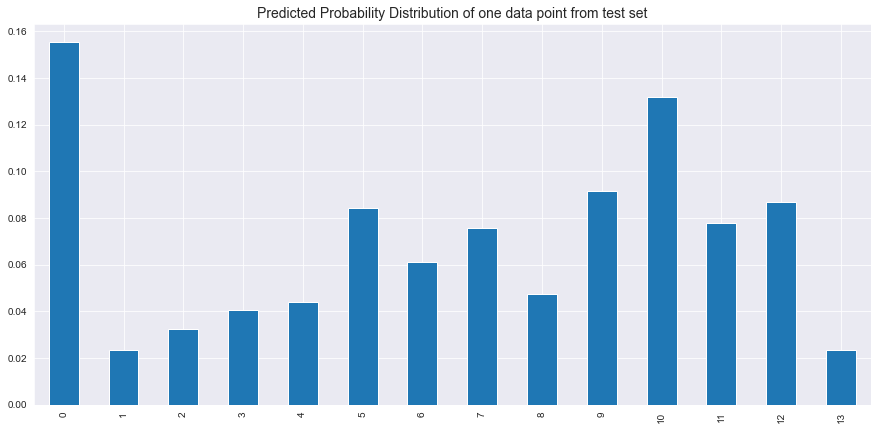

In [69]:
plt.figure(figsize=(15,7))
test_result_df.loc[0][:14].plot(kind='bar')
plt.title('Predicted Probability Distribution of one data point from test set', size=14)

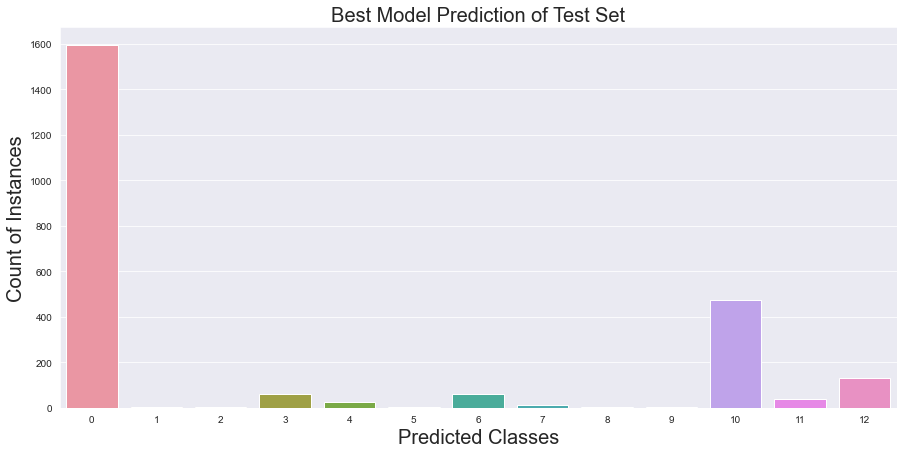

In [70]:
plt.figure(figsize=(15,7))
sns.countplot(x=test_result_df.y_pred)
plt.title('Best Model Prediction of Test Set', size=20)
plt.xlabel('Predicted Classes',size=20 )
plt.ylabel('Count of Instances', size=20)
plt.savefig('Prediction')

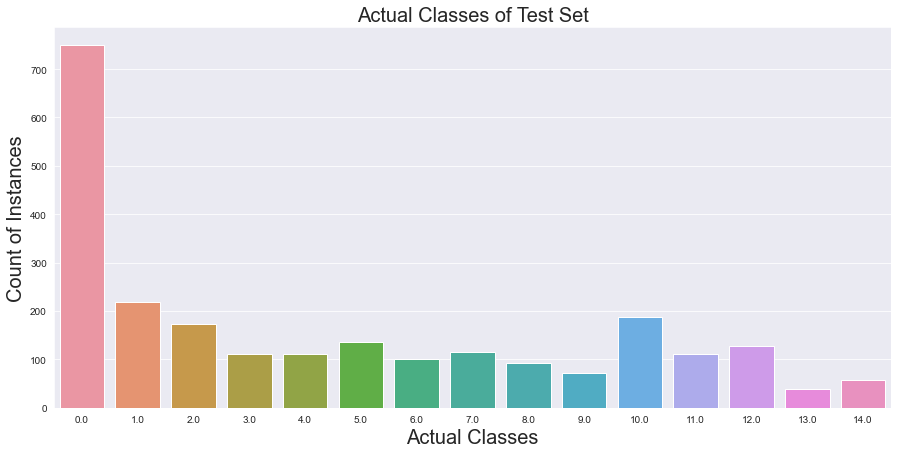

In [71]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_test)
plt.title('Actual Classes of Test Set', size=20)
plt.xlabel('Actual Classes',size=20 )
plt.ylabel('Count of Instances', size=20)
plt.savefig('Prediction')


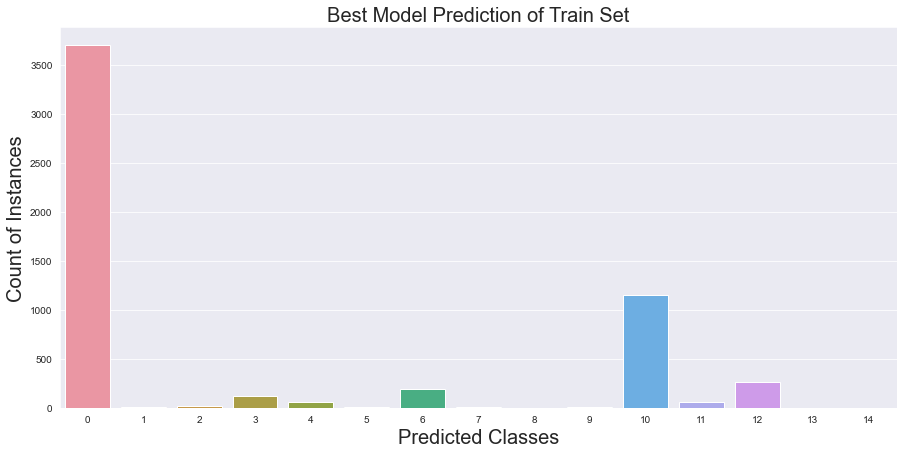

In [72]:
plt.figure(figsize=(15,7))
sns.countplot(x=train_result_df.y_pred)
plt.title('Best Model Prediction of Train Set', size=20)
plt.xlabel('Predicted Classes',size=20 )
plt.ylabel('Count of Instances', size=20)
plt.savefig('Prediction')

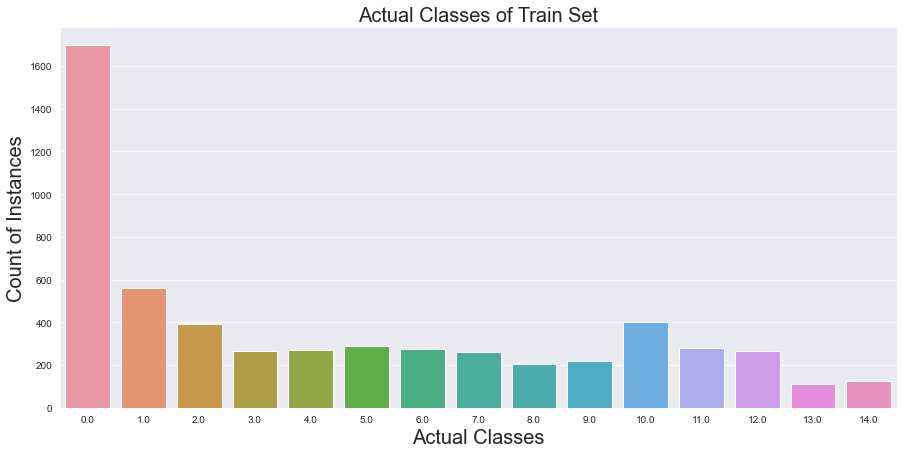

In [73]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_train)
plt.title('Actual Classes of Train Set', size=20)
plt.xlabel('Actual Classes',size=20 )
plt.ylabel('Count of Instances', size=20)
plt.savefig('Prediction')